<strong><h1>Lung Cancer Severity Prediction Model</h1></strong>

Cancer is a major global health issue due to its high prevalence and the significant impact it has on individuals and healthcare systems. Determining cancer severity is crucial because it directly impacts treatment decisions, patient outcomes, and resource allocation. By understanding the factors that contribute to the severity of cancer, we can tailor treatments more effectively, potentially improving survival rates and quality of life for patients. This project focuses on training a machine learning model on a dataset of cancer patients to accurately predict cancer severity and identify how various risk factors affect it. 

<strong><h3>Research Area</h3></strong>
Our methodology combines statistical analysis and machine learning, specifically using logistic regression for its capability with categorical outcomes to solve the following research question:

<em><strong>To what extent can machine learning models be applied to accurately predict the severity of cancer in patients?</strong></em>

<em>Link to Medium blogpost:</em> https://medium.com/@tahafaisal999/lung-cancer-predicting-cancer-severity-in-patients-ca5c92114f77</br>
<em>Link to dataset:</em> https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

<strong>Importing Libraries</strong>

In [6]:
# Used for data analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Used for hypohtesis testing
from scipy import stats
from scipy.stats import norm

# Used for training and testing the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss

# Used for evaluating model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



<h3><strong>Exploring Dataset</strong></h3>

In [8]:
original_df = pd.read_csv('cancer patient data sets.csv')
original_df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [9]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [10]:
original_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


<strong>Data Cleaning</strong>

In [11]:
numberOfNullVals = original_df.isnull().sum().sum()
numberOfNullVals

0

In [12]:
original_df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [13]:
original_df.set_index("index",inplace=True)
original_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [14]:
genderDict = {1 : "Male", 2 : "Female"}
original_df["Gender"] = original_df["Gender"].map(genderDict)
original_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,Male,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,Male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,Male,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,Male,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,Female,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,Female,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [15]:
def age_group(val):
    if((val >= 0) & (val <= 18)):
        return "0-18"
    elif((val > 18) & (val <= 30)):
        return "19-30"
    elif((val > 30) & (val <= 40)):
        return "30-40"
    elif((val > 40) & (val <= 50)):
        return "41-50"
    else:
        return ">50"

original_df["Age Range"] = original_df["Age"].apply(age_group)
original_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age Range
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,30-40
1,P10,17,Male,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,0-18
2,P100,35,Male,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,30-40
3,P1000,37,Male,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,30-40
4,P101,46,Male,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,High,41-50
996,P996,37,Female,6,8,7,7,7,6,7,...,6,5,7,2,4,3,1,4,High,30-40
997,P997,25,Female,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,19-30


In [16]:
def casing(val):
    arr = val.split(' ')
    new_arr = []
    for word in arr:
        temp = word[0].upper() + word[1:].lower()
        new_arr.append(temp)
    final_string = ' '.join(new_arr)
    return final_string

new_cols = [casing(col) for col in original_df.columns]
original_df.columns = new_cols
original_df.index.name = "Index"
original_df

,Patient Id,Age,Gender,Air Pollution,Alcohol Use,Dust Allergy,Occupational Hazards,Genetic Risk,Chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness Of Breath,Wheezing,Swallowing Difficulty,Clubbing Of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age Range
Index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,Male,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,30-40
1,P10,17,Male,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,0-18
2,P100,35,Male,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,30-40
3,P1000,37,Male,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,30-40
4,P101,46,Male,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,6,7,...,3,2,7,8,2,4,5,3,High,41-50
996,P996,37,Female,6,8,7,7,7,6,7,...,6,5,7,2,4,3,1,4,High,30-40
997,P997,25,Female,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,19-30


<h4><strong>EDA and Data Visualisation</strong></h4>

Text(0, 0.5, 'Count')

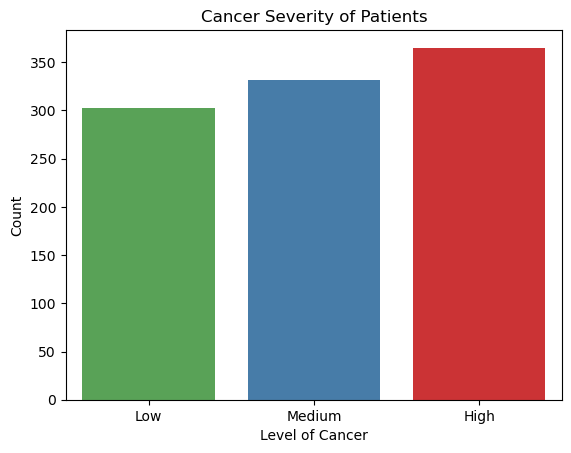

In [17]:
sns.countplot(x="Level",hue="Level",data=original_df,palette=['#4daf4a','#377eb8','#e41a1c'])
plt.title("Cancer Severity of Patients")
plt.xlabel("Level of Cancer")
plt.ylabel("Count")

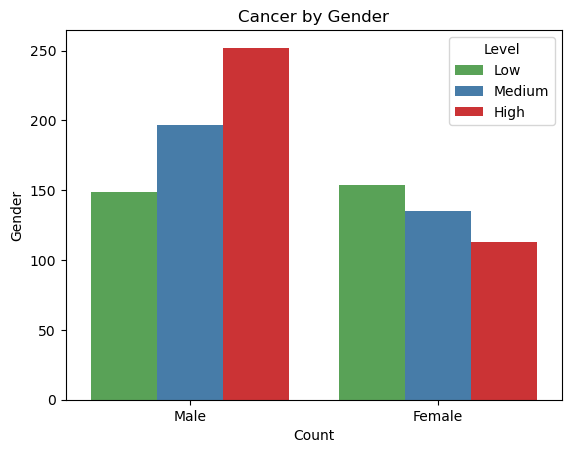

In [18]:
sns.countplot(x="Gender",hue="Level",data=original_df,palette=['#4daf4a','#377eb8','#e41a1c'])
plt.title("Cancer by Gender")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

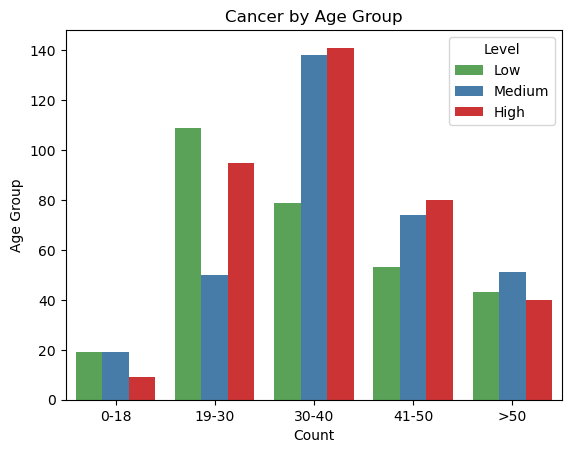

In [19]:
sns.countplot(x="Age Range",hue="Level",data=original_df,order=["0-18","19-30","30-40","41-50",">50"],palette=['#4daf4a','#377eb8','#e41a1c'])
plt.title("Cancer by Age Group")
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.show()

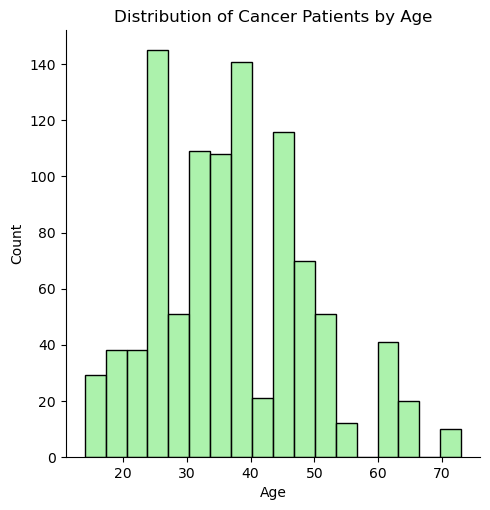

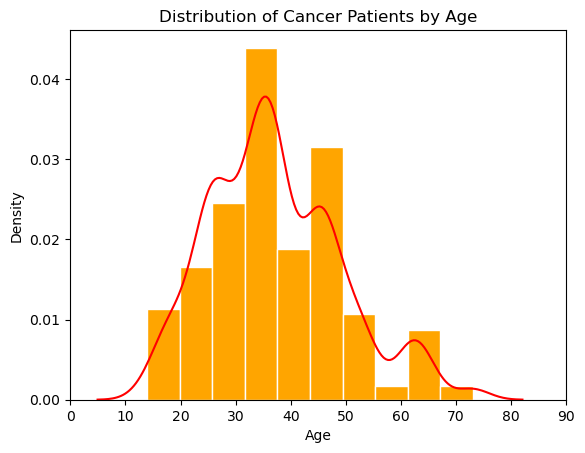

In [20]:
sns.displot(original_df["Age"],color="Lightgreen")
plt.title("Distribution of Cancer Patients by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
sns.kdeplot(original_df["Age"],color="red")
plt.hist(original_df["Age"],density=True, ec='w',color="orange")
plt.title("Distribution of Cancer Patients by Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.xlim(0,90)
plt.show()

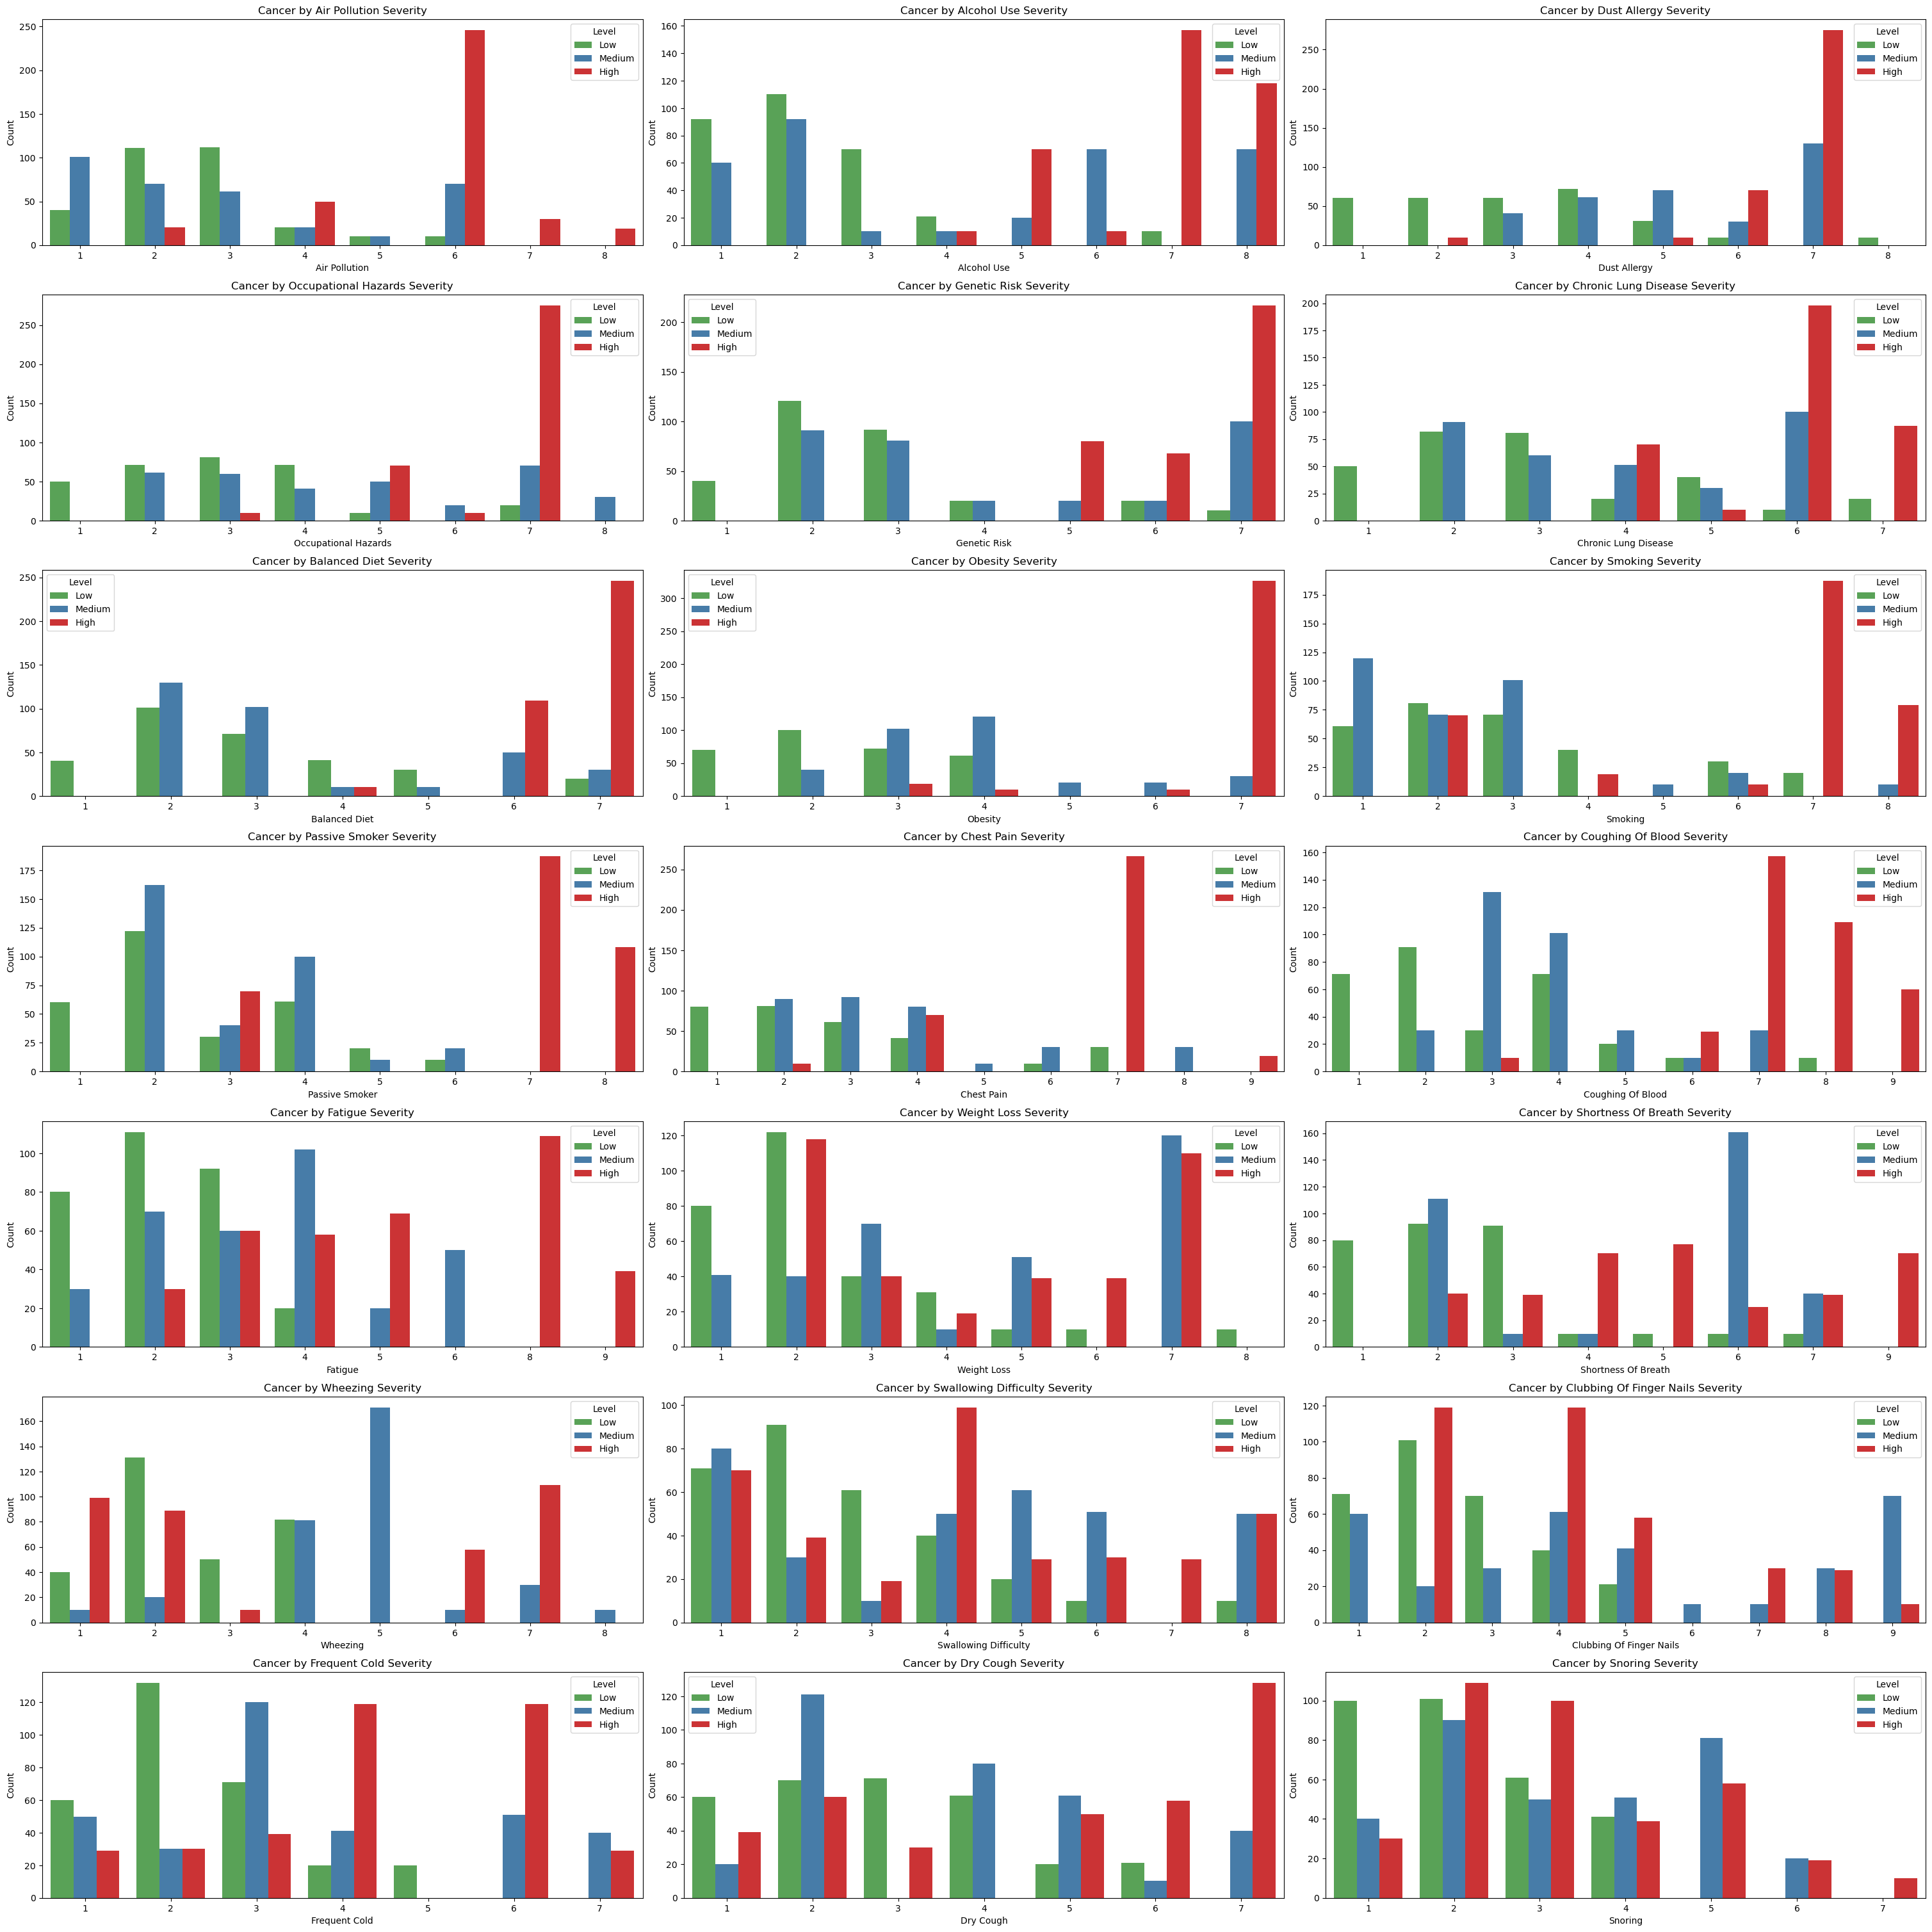

In [21]:
fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(30, 30))
ax = ax.flatten()
cols = original_df.columns[3:-2]
sorted_df = original_df.sort_values("Level",ascending=True)
for i, col in enumerate(cols):
    sns.countplot(x=col,data=sorted_df, hue="Level", hue_order = ["Low","Medium","High"],ax=ax[i],palette=['#4daf4a','#377eb8','#e41a1c'])
    ax[i].set_title(f'Cancer by {col.title()} Severity')
    ax[i].set_ylabel("Count")
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()


In [22]:
# Converting categorical labels to numerical labels through ordinal encoding
df_numerical = original_df.copy()
levelDict = {"Low":0,"Medium":1,"High":2}
genderDictNumerical = {"Male": 1, "Female":2}
df_numerical.loc[:,'Gender'] = df_numerical.loc[:,'Gender'].map(genderDictNumerical)
df_numerical.loc[:,"Level"] = df_numerical.loc[:,"Level"].map(levelDict)
df_numerical = df_numerical.iloc[:,1:-1]

<Axes: >

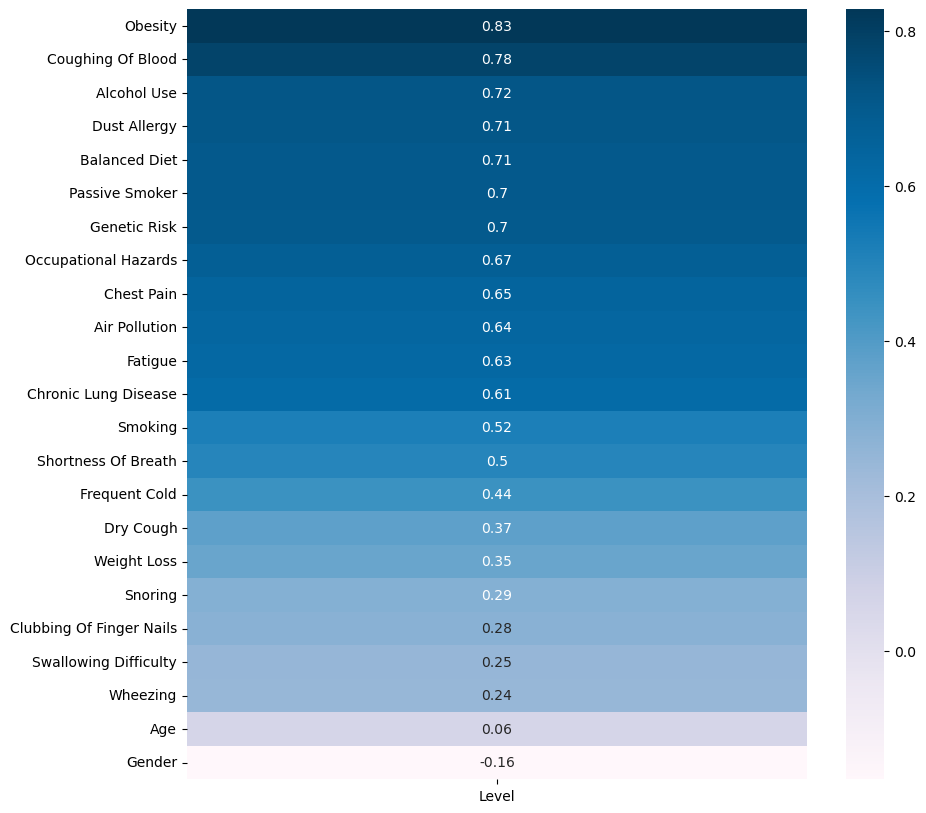

In [23]:
correlation_matrix = df_numerical.corr()

correlation = correlation_matrix['Level'].sort_values(ascending=False)
correlation_df = correlation.to_frame()
correlation_df = correlation_df.drop(index='Level')

plt.figure(figsize=(10,10))
sns.heatmap(correlation_df, annot=True, cmap=plt.cm.PuBu)

<h4><strong>Hypothesis Testing</strong></h4>

<em>T-test</em>

In [25]:
sample_data = original_df["Age"]
population_mean = 70

t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -86.46452815185012
P-value: 0.0


<em>Simulating under the null</em>

In [33]:
observed_statistic = abs(np.mean(sample_data)-70)

null_mean = 70  
simulations = 10000 

simulated_means = [np.mean((abs(norm.rvs(loc=null_mean, scale=5, size=1)-null_mean))) for _ in range(simulations)]

p_value = np.mean([mean >= observed_statistic for mean in simulated_means])


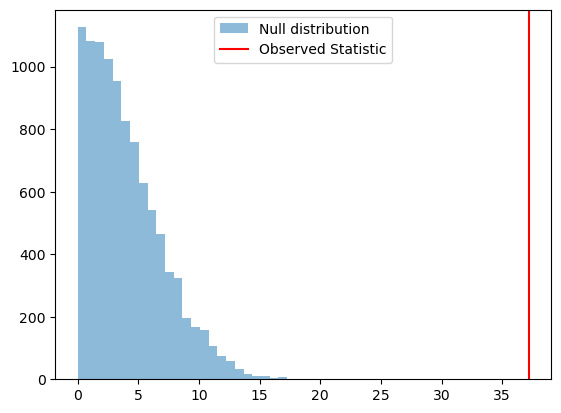

Observed Statistic: 32.826
P-value: 0.0


In [35]:
plt.hist(simulated_means, bins=30, alpha=0.5, label='Null distribution')
plt.axvline(abs(observed_statistic-null_mean), color='red', label='Observed Statistic')
plt.legend()
plt.show()

print("Observed Statistic:", observed_statistic)
print("P-value:", p_value)

<h3><strong>Feature Selection and ML Model</strong></h3>

<h4><strong>Feature Selection and Train-Test Split</strong></h4>

In [43]:
X = df_numerical.drop((['Gender','Level','Wheezing', 'Swallowing Difficulty', 'Clubbing Of Finger Nails', 'Snoring','Frequent Cold','Dry Cough']), axis=1)
y = df_numerical['Level']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

<h4><strong>Training Logistic Regression Models</strong></h4>

In [42]:
model_ovr = LogisticRegression(max_iter=1000, multi_class='ovr')
model_softmax = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

<h4><strong>Cross Validation</strong></h4>

In [50]:
# Helper function to calculate training and validation error
def evaluate_model(model, X, y, cv):
    train_log_losses = []
    test_log_losses = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        prob_train = model.predict_proba(X_train)
        prob_test = model.predict_proba(X_test)
        
        log_loss_train = log_loss(y_train, prob_train)
        log_loss_test = log_loss(y_test, prob_test)
        
        train_log_losses.append(log_loss_train)
        test_log_losses.append(log_loss_test)
    
    return train_log_losses, test_log_losses

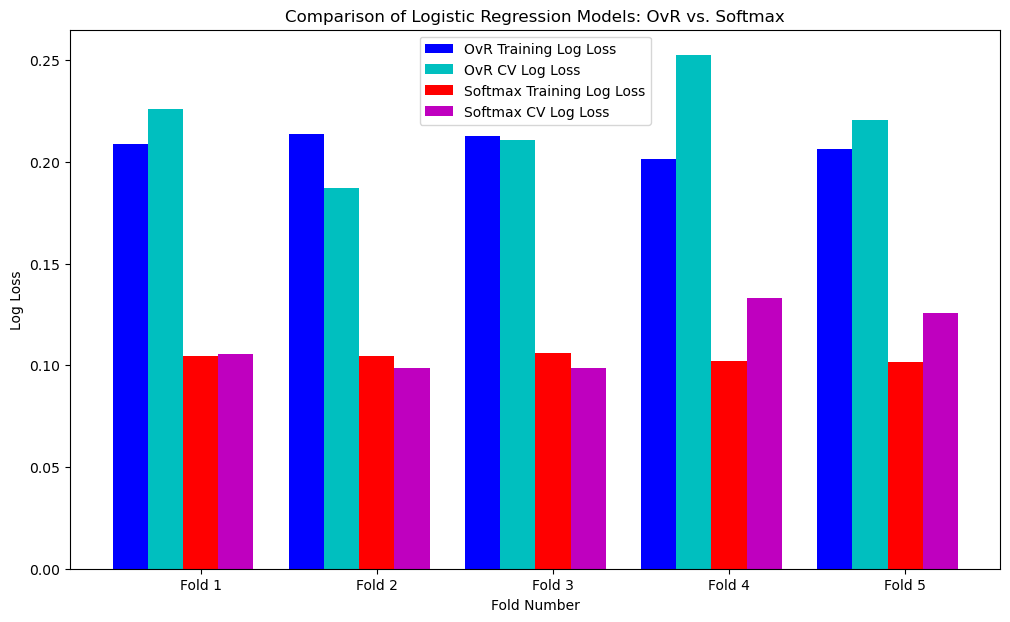

In [62]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_losses_ovr, test_losses_ovr = evaluate_model(model_ovr, X_train, y_train, cv)
train_losses_softmax, test_losses_softmax = evaluate_model(model_softmax, X_train, y_train, cv)

n_folds = len(train_losses_ovr)

fig, ax = plt.subplots(figsize=(12, 7))

index = np.arange(n_folds)
bar_width = 0.2

ax.bar(index - bar_width, train_losses_ovr, bar_width, label='OvR Training Log Loss', color='b')
ax.bar(index, test_losses_ovr, bar_width, label='OvR CV Log Loss', color='c')

ax.bar(index + bar_width, train_losses_softmax, bar_width, label='Softmax Training Log Loss', color='r')
ax.bar(index + 2 * bar_width, test_losses_softmax, bar_width, label='Softmax CV Log Loss', color='m')

ax.set_xlabel('Fold Number')
ax.set_ylabel('Log Loss')
ax.set_title('Comparison of Logistic Regression Models: OvR vs. Softmax')
ax.set_xticks(index + bar_width)
ax.set_xticklabels([f"Fold {i+1}" for i in range(n_folds)])
ax.legend()

plt.show()

<h4><strong>Evaluating Chosen Model (Softmax)</strong></h4>

In [49]:
# Helper function to generate confusion matrix
def CM(y_test, y_pred, col_names, title='', cmap=plt.cm.Blues):
    CM = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(CM, annot=True, fmt=".0f", cmap=cmap)

    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



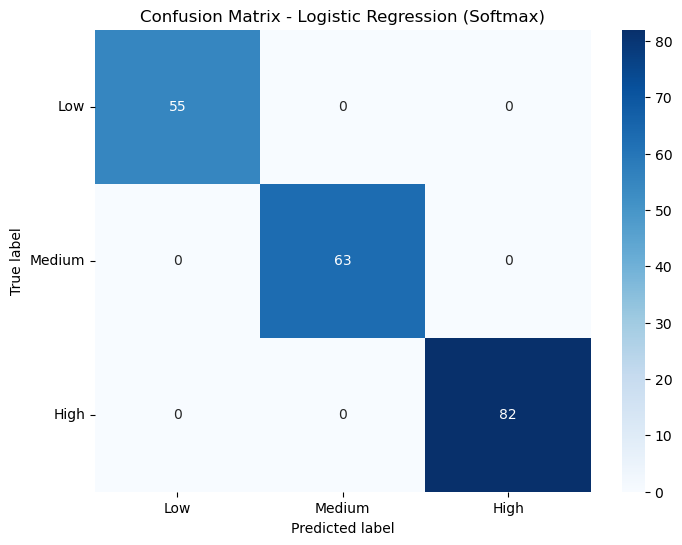

In [40]:
model_softmax = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model_softmax.fit(X_train, y_train)

y_pred = model_softmax.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
CM(y_test, y_pred, col_names=['Low', 'Medium', 'High'], title='- Logistic Regression (Softmax)', cmap='Blues')

<strong>Training model on entire dataset</strong>

In [57]:
model_softmax.fit(X_scaled,y_encoded)
model_model = model_softmax.predict_proba(X_scaled)

model_model_log_loss = log_loss(y_encoded, model_model)

y_pred_entire = model_softmax.predict(X_scaled)

print("Log loss of Softmax Model on entire dataset:", model_model_log_loss)
print("Accuracy:", accuracy_score(y_encoded, y_pred_entire))
print("Confusion Matrix:\n", confusion_matrix(y_encoded, y_pred_entire))
print("Classification Report:\n", classification_report(y_encoded, y_pred_entire))

Log loss of Softmax Model on entire dataset: 0.08271510658333636
Accuracy: 0.99
Confusion Matrix:
 [[303   0   0]
 [ 10 322   0]
 [  0   0 365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       303
           1       1.00      0.97      0.98       332
           2       1.00      1.00      1.00       365

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [53]:
coefs = model_softmax.coef_
coefs

array([[ 0.29899642,  0.7575591 , -0.83715649, -0.86106189,  0.86077675,
        -1.68069144, -1.28740366,  0.90674866, -3.27404393,  0.83333238,
        -2.03877737,  0.45499748, -1.00069098, -3.93543746,  1.15541534,
        -2.52779288],
       [ 0.11151353, -1.30231034, -0.10091689,  1.21431965, -1.02367944,
         1.22870404,  0.23990019, -1.39077405,  1.31626967, -1.14589818,
         0.05440912, -0.39882867, -0.40827662,  1.35597689, -2.24451051,
         0.88837051],
       [-0.41050995,  0.54475124,  0.93807338, -0.35325777,  0.1629027 ,
         0.45198739,  1.04750347,  0.4840254 ,  1.95777426,  0.3125658 ,
         1.98436825, -0.05616881,  1.4089676 ,  2.57946057,  1.08909518,
         1.63942237]])